In [26]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
from sklearn.datasets import load_boston
from pandas_profiling import ProfileReport
boston = load_boston()
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df["Price"]=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [28]:
#profile=ProfileReport(df,title="EDA through Pandas Profiling",explorative=True)
#profile.to_widgets()

# EDA

## Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


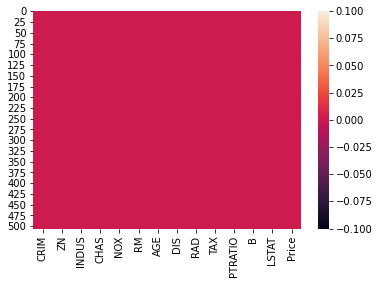

In [29]:
sns.heatmap(df.isnull())
df.info()

In [30]:
for features in df.columns:
    print("{} has {} unique features".format(features,len(df[features].unique())))

CRIM has 504 unique features
ZN has 26 unique features
INDUS has 76 unique features
CHAS has 2 unique features
NOX has 81 unique features
RM has 446 unique features
AGE has 356 unique features
DIS has 412 unique features
RAD has 9 unique features
TAX has 66 unique features
PTRATIO has 46 unique features
B has 357 unique features
LSTAT has 455 unique features
Price has 229 unique features


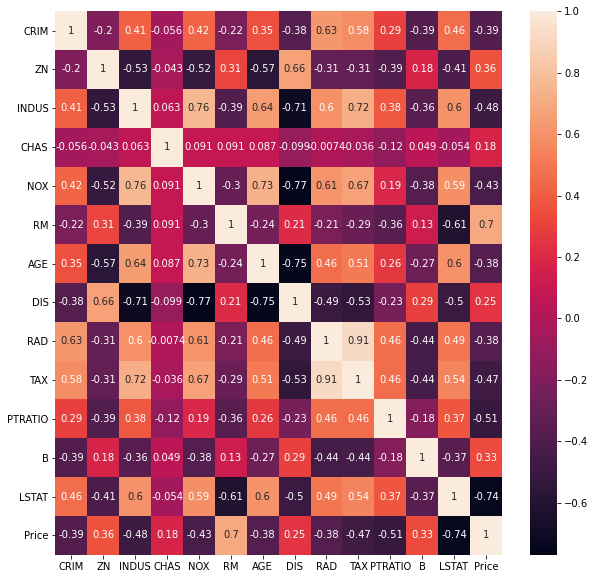

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

No missing values in our data.

### Outlires

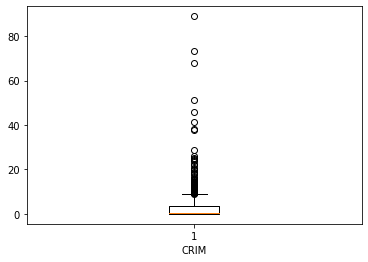

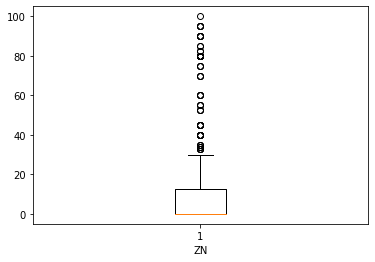

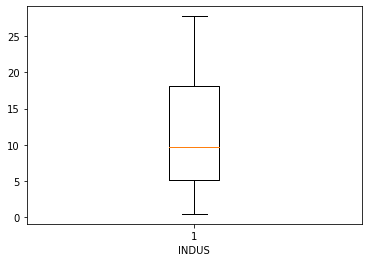

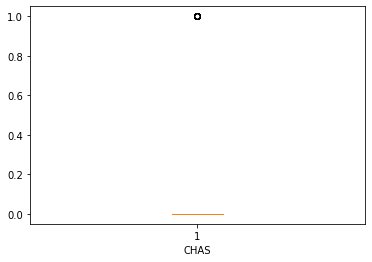

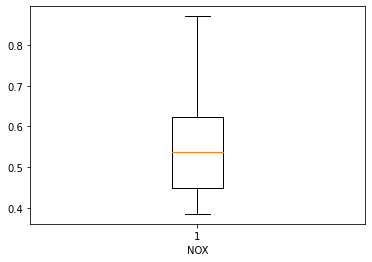

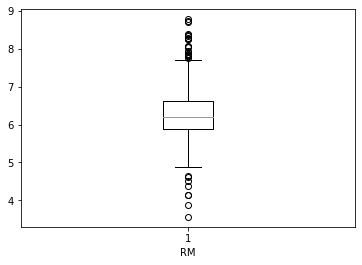

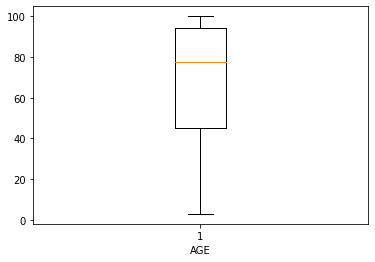

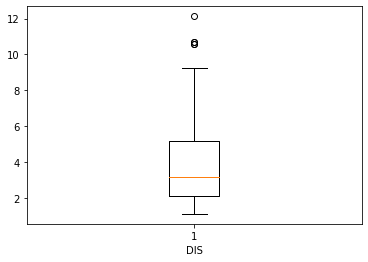

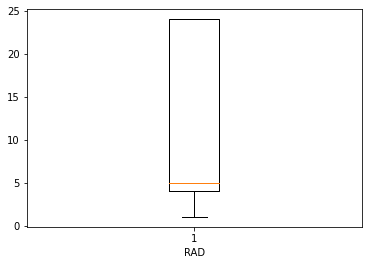

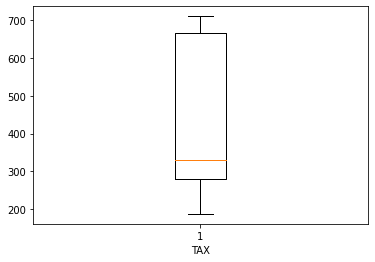

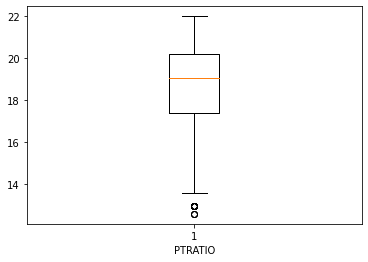

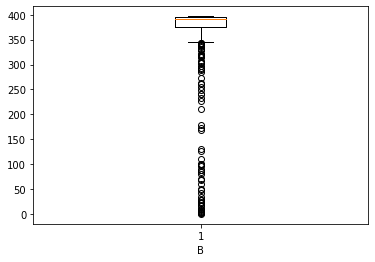

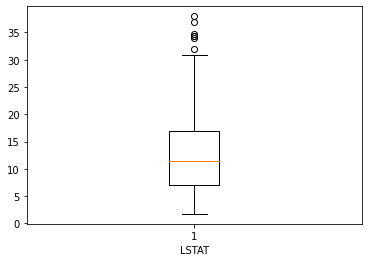

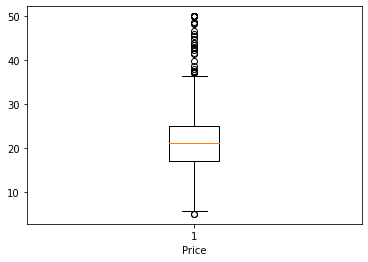

In [32]:
for feature in df.columns:
    data=df.copy()
    plt.boxplot(data[feature])
    plt.xlabel(feature)
    plt.show()

### Correlation with dependent variable and Distribution

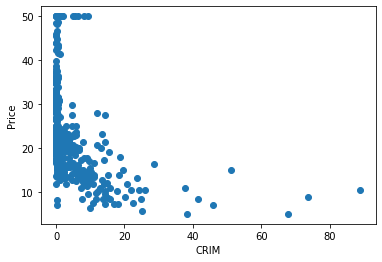

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


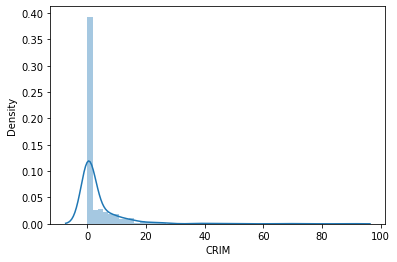

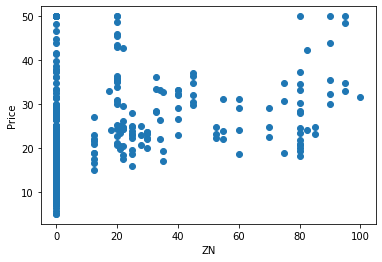

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


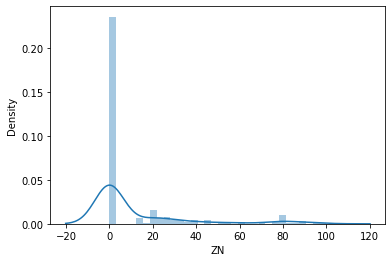

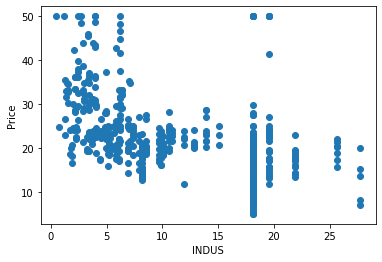

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


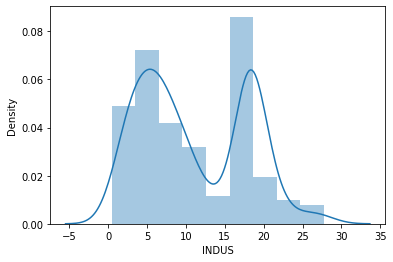

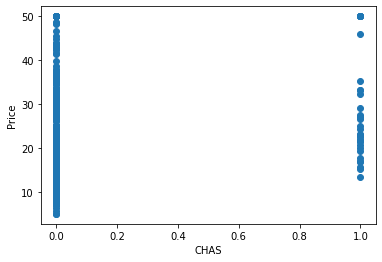

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


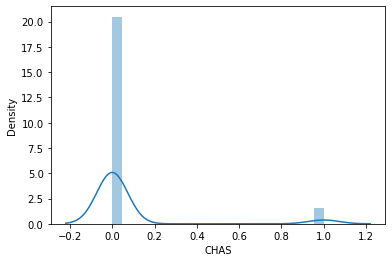

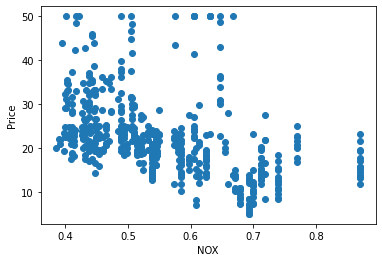

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


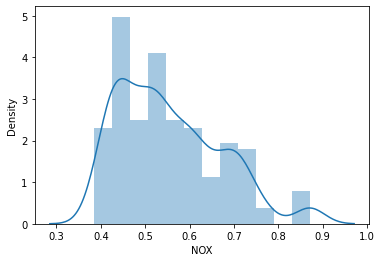

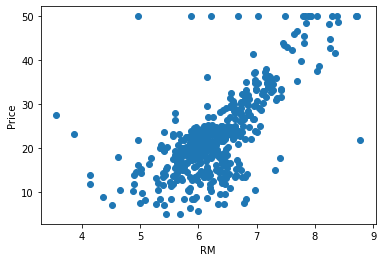

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


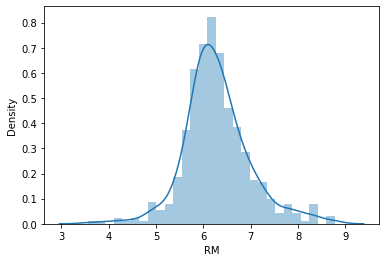

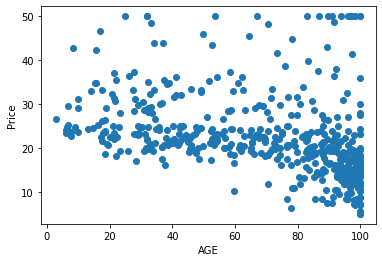

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


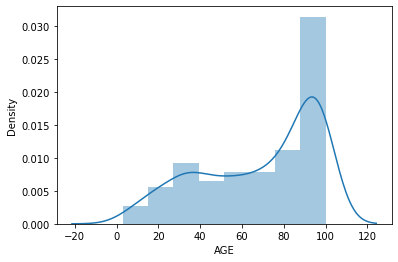

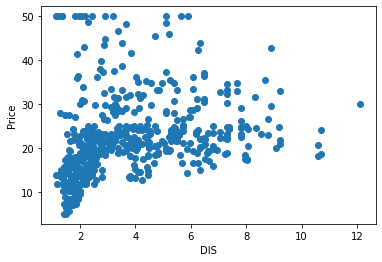

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


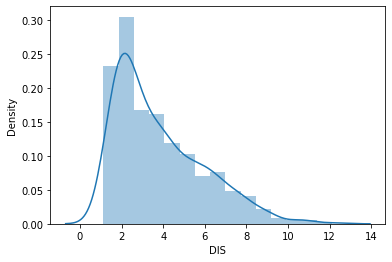

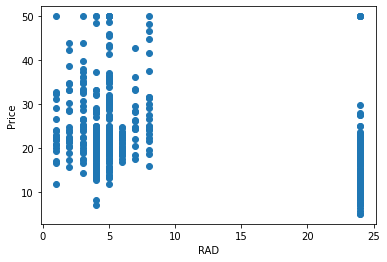

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


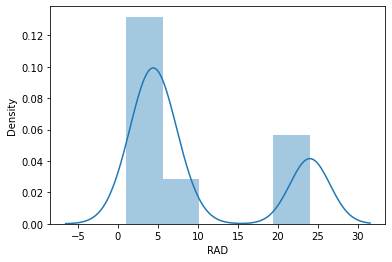

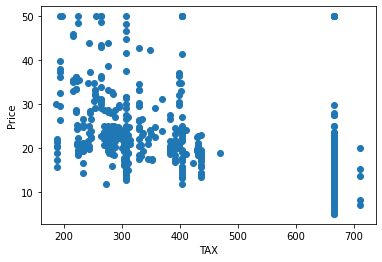

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


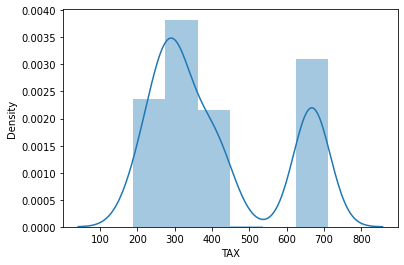

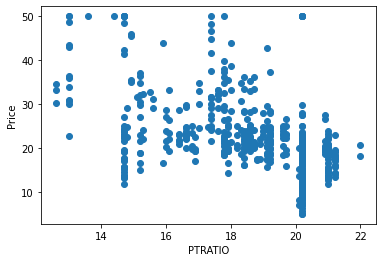

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


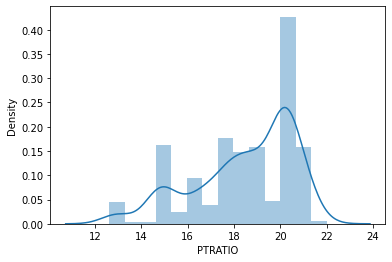

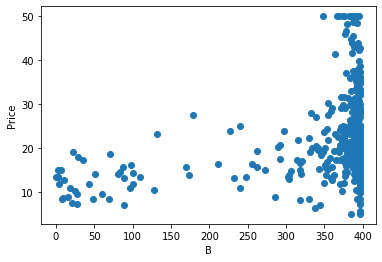

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


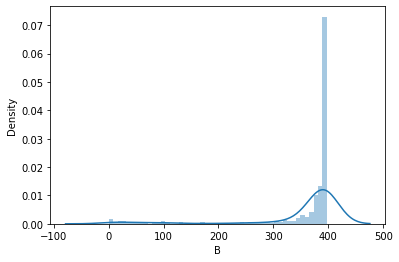

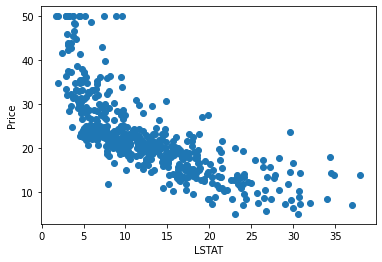

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


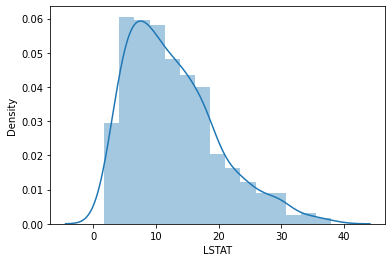

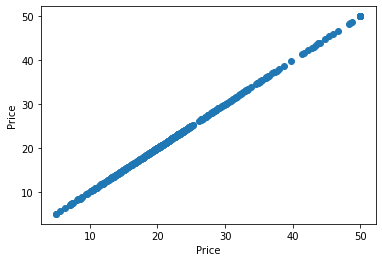

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


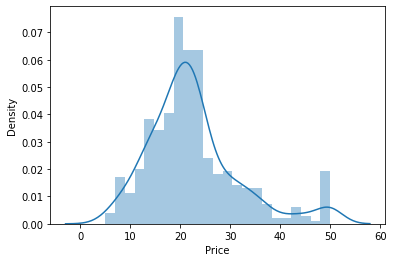

In [33]:
for feature in df.columns:
    plt.scatter(df[feature],df['Price'])
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()
    sns.distplot(df[feature])
    plt.show()

We have concluded that we need to select only relevant features for the LinearRegression and also handle the outlires.
Important fetures ==> CRIM , INDUS, NOX, RM, AGE, DIS,LSTAT, PTRATIO, B


## Feature Engineering

First we will perform Logarithmic transformation to deal with skewness in data

In [34]:
for feature in df.columns:
    if 0 not in df[feature].unique():
        df[feature]=np.log(df[feature])

In [35]:
X = df.drop(['Price'], axis = 1)
y = pd.DataFrame(df['Price'])

In [36]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-5.064036,18.0,0.837248,0.0,-0.619897,1.883275,4.177459,1.408545,0.000000,5.690359,2.727853,5.983684,1.605430,3.178054
1,-3.600502,0.0,1.955860,0.0,-0.757153,1.859574,4.368181,1.602836,0.693147,5.488938,2.879198,5.983684,2.212660,3.072693
2,-3.601235,0.0,1.955860,0.0,-0.757153,1.971996,4.112512,1.602836,0.693147,5.488938,2.879198,5.973377,1.393766,3.546740
3,-3.430523,0.0,0.779325,0.0,-0.780886,1.945624,3.824284,1.802073,1.098612,5.402677,2.928524,5.977949,1.078410,3.508556
4,-2.672924,0.0,0.779325,0.0,-0.780886,1.966693,3.992681,1.802073,1.098612,5.402677,2.928524,5.983684,1.673351,3.589059


### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 43)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

### Scaling

In [39]:
scale=[feature for feature in X_train.columns if feature not in ['Price']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [40]:
X_train=pd.DataFrame(X_train,columns=X.columns)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.930468,0.000000,0.882184,0.0,0.713655,0.472194,1.000000,0.122989,1.000000,0.950849,0.846846,1.000000,0.938051
1,0.578759,0.000000,0.903872,0.0,1.000000,0.668522,1.000000,0.198634,0.506422,0.573205,0.276580,0.987972,0.474162
2,0.288111,0.131579,0.652366,0.0,0.363523,0.557431,0.734043,0.699723,0.506422,0.378394,0.336593,0.997718,0.720441
3,0.372922,0.000000,1.000000,0.0,0.551813,0.396511,0.994294,0.212685,0.436209,1.000000,0.837941,0.969075,0.928189
4,0.593026,0.000000,0.934645,0.0,0.582290,0.380293,1.000000,0.107748,0.436209,0.634094,0.933540,1.000000,0.976478


In [41]:
X_test=pd.DataFrame(X_test,columns=X.columns)
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.702578,0.000000,0.882184,0.0,0.845623,0.649292,0.963894,0.356407,1.000000,0.950849,0.846846,0.991867,0.491376
1,0.718926,0.000000,0.882184,0.0,0.726244,0.587502,0.945665,0.289795,1.000000,0.950849,0.846846,0.993292,0.778382
2,0.367163,0.231579,0.570989,0.0,0.118798,0.619095,0.934135,0.873363,0.612296,0.422972,0.746380,0.992458,0.577794
3,0.087370,1.052632,0.159696,0.0,0.059284,0.719422,0.744703,0.887982,0.506422,0.232092,0.324750,0.998578,0.269603
4,0.372209,0.231579,0.570989,0.0,0.118798,0.500285,0.924338,0.867776,0.612296,0.422972,0.746380,0.991089,0.645801


# Model Training

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_train=pd.DataFrame(y_train,columns=['Price'])
y_train=y_train.reset_index()
y_train=y_train.drop(['index'],axis=1)
y_train.head()

,Price
0,1.609438
1,3.148453
2,3.077312
3,2.091864
4,2.667228


In [44]:
y_test=pd.DataFrame(y_test,columns=['Price'])
y_test=y_test.reset_index()
y_test=y_test.drop(['index'],axis=1)
y_test.head()

,Price
0,3.218876
1,3.144152
2,3.020425
3,3.453157
4,2.867899


In [45]:
y_pred=lin_model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

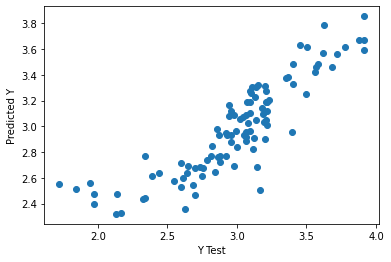

In [46]:
plt.scatter(y_test,lin_model.predict(X_test))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [47]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.1603617704188209
MSE: 0.04836583171916537
RMSE: 0.21992233110615522


In [48]:
y_pred=pd.DataFrame(y_pred,columns=['Pred'],index=None)
pd.concat([np.exp(y_test['Price']),np.exp(y_pred['Pred'])], axis=1)

,Price,Pred
0,25.0,20.288790
1,23.2,14.652983
2,20.5,21.244323
3,31.6,37.670333
4,17.6,18.754290
...,...,...
97,25.0,24.206582
98,33.0,25.808936
99,43.8,37.347259
100,16.2,15.440257


In [49]:
print("Accuracy on the Train data is {} % for our Linear Regression model.".format(100*metrics.r2_score(y_train,lin_model.predict(X_train))))

Accuracy on the Train data is 76.82868801899278 % for our Linear Regression model.


In [50]:
print("Accuracy on the Test data is {} % for our Linear Regression model.".format(100*metrics.r2_score(y_test,lin_model.predict(X_test))))

Accuracy on the Test data is 76.52690229608872 % for our Linear Regression model.
